In [3]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('/content/Housing.csv')

# Handle missing values for numerical columns only
for column in df.select_dtypes(include=np.number).columns:
    df[column].fillna(df[column].mean(), inplace=True)

# Or drop rows with missing values
# df.dropna(inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Standardize formats
# Check if 'date_column' exists and is in a format that can be converted to datetime
if 'date_column' in df.columns and pd.api.types.is_string_dtype(df['date_column']):
    try:
        df['date_column'] = pd.to_datetime(df['date_column'])
    except ValueError:
        print("Warning: 'date_column' could not be converted to datetime.")

# Detect outliers for numerical columns only
for column in df.select_dtypes(include=np.number).columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[column] < (Q1 - 1.5 * IQR)) | (df[column] > (Q3 + 1.5 * IQR)))]

<ipython-input-3-1df010271ac9>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mean(), inplace=True)


In [7]:
# Summary statistics
print(df.describe())

# Correlation analysis
# Select only numerical features for correlation analysis
numerical_df = df.select_dtypes(include=np.number)
corr_matrix = numerical_df.corr()
print(corr_matrix)

# Value counts for categorical data
# Check if 'category_column' exists before accessing it
if 'category_column' in df.columns:
    print(df['category_column'].value_counts())
else:
    print("Warning: 'category_column' not found in the DataFrame.")

              price          area    bedrooms  bathrooms     stories  \
count  3.650000e+02    365.000000  365.000000      365.0  365.000000   
mean   4.045012e+06   4623.810959    2.742466        1.0    1.553425   
std    1.247181e+06   1723.729307    0.624130        0.0    0.616192   
min    1.750000e+06   1650.000000    1.000000        1.0    1.000000   
25%    3.150000e+06   3460.000000    2.000000        1.0    1.000000   
50%    3.850000e+06   4079.000000    3.000000        1.0    1.000000   
75%    4.690000e+06   5800.000000    3.000000        1.0    2.000000   
max    9.100000e+06  10360.000000    4.000000        1.0    3.000000   

          parking  
count  365.000000  
mean     0.536986  
std      0.760911  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      2.000000  
              price      area  bedrooms  bathrooms   stories   parking
price      1.000000  0.494096  0.271667        NaN  0.169148  0.342046
area       0.494096  1.000000

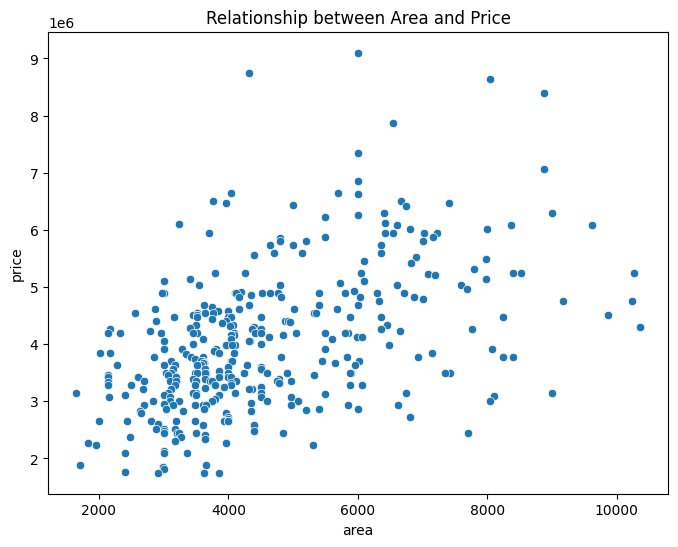

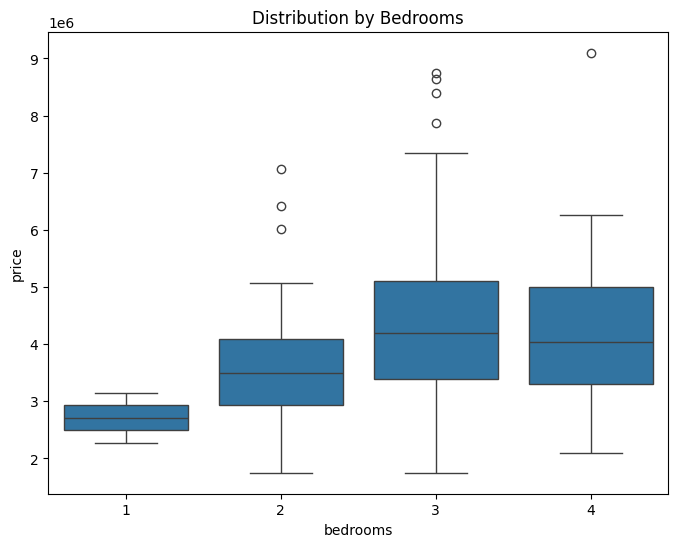

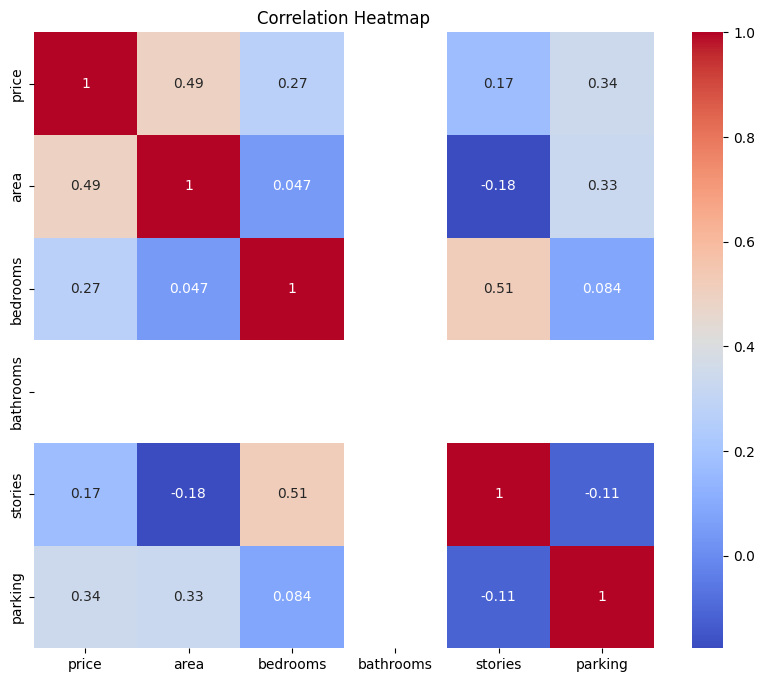

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'numeric_column' in df.columns:
    # Histogram
    plt.figure(figsize=(8,6))
    sns.histplot(df['numeric_column'], kde=True)
    plt.title('Distribution of Numeric Column')
    plt.show()
else:
    print("Warning: 'numeric_column' not found in DataFrame. Skipping histogram.")
# Scatter plot
# Replace 'column1' and 'column2' with actual column names from your DataFrame
plt.figure(figsize=(8,6))
sns.scatterplot(x='area', y='price', data=df) # Changed column names to 'area' and 'price' as an example
plt.title('Relationship between Area and Price') # Updated title to reflect the changed columns
plt.show()

# Box plot
# Replace 'category_column' and 'numeric_column' with actual column names
plt.figure(figsize=(8,6))
sns.boxplot(x='bedrooms', y='price', data=df)  # Changed column names as an example
plt.title('Distribution by Bedrooms') # Updated title to reflect the changed columns
plt.show()

# Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data
# Replace 'area', 'bedrooms' with the actual column names from your DataFrame for features
# Replace 'price' with the actual column name from your DataFrame for the target variable
X = df[['area', 'bedrooms']]
y = df['price']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

Mean Squared Error: 1416268915095.88
R2 Score: 0.3362091987567216
